# Python-MLearning: A comparison of Machine Learning Models for Digits Recognition using PCA Reduced Dimension, and Scikit-learn Library .

 By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; August 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>

## I GENERALITIES:

This project deals with a way to apply several models to the MNIST database, in order to obtain the one that allows recognizing and classifying handwritten digits in an appropriate way. 

The evaluation and selection of the best model is made according to a precision measurement (accuracy_score) and by the using the Scikit-learn Python library.

All models incorporated here, except to the Neural Network one, are presented and compared to their default version provided by the Scikit-learn library. 

This project considers the PCA components of the predictive variables of the MINIST database (154) that explain 95% of the total variation of the data. This turns the process to be a lot of faster than using the original set of variables (784).  In the same context and idea, the accuracy measures for each algorithm was evaluated only 3 times (3 fold cross validation).  

The MNIST database is available at http://yann.lecun.com/exdb/mnist/. The present project initially considers a complete version of MINIST called "mnist_My.csv" which includes the 70 thousand original images. This is achieved by joining the training (60,000 images) and testing (10,000) files that are usually delivered separately.

A way to explore the MNIST database can be found [here](http://www.arqmain.net/Researches/Researchs/Digit_Recognition/Exploratory_DAnalysis/Exploratory_DAnalysis_MNIST_RProject.html).

Hitting at the right machine learning algorithm is the ideal approach to achieve higher accuracy. But, it is easier said than done. Improving the models can be done by tuning them in an appropriate way. Every Machine Learning model comes with a variety of hyper parameters possible to be tuned and these hyper parameters can be vitally important to the performance of the algorithm.

Finally, the way to compare models presented in this project may be used as a template that you can apply on your dataset as a first approximation to get your final selected model. 


## II Import Python libraries

Let’s import all of the modules, functions and objects we are going to use.

In [1]:
# Load libraries
from __future__ import print_function
%matplotlib inline

import os
import subprocess
from datetime import datetime
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA


## III  LOADING DATA

In [2]:
#Checking working directory
# import os
os.getcwd()

'C:\\Users\\Alvaro\\Documents\\R-Python-Projects_April042018\\Python_Projects\\Machine-Learning\\MLComparisons\\DigitsRecognition'

In [3]:
#List files in a directory
os.listdir()

['.ipynb_checkpoints',
 'Backup',
 'Link to Heat Maps.txt',
 'Links to MLComparisons_MNIST GITHUBE and Nbviewer.txt',
 'PYTHON-MLearning_MLComparisons_MNIST_Final.ipynb']

In [4]:
# read csv (comma separated value) into data
data=pd.read_csv('..\\Randomforest\\RandomForest2\\mnist_My.csv')
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
y_data = data['label'].values
X_data = data.drop('label', axis=1).values                   
data.shape, y_data.shape, X_data.shape

((70000, 785), (70000,), (70000, 784))

## IV MACHINE LEARNING MODELS

## Reduce the 784 dimension into 95% information

In [6]:
#Reduce the 784 dimension into 95% information
pca = PCA(.95)
data_pca = pca.fit_transform(X_data)

## Train and Validation Datasets

In [7]:
#Divide data_pca and Y_data into train and test data
X_train, X_validation, Y_train,  Y_validation = train_test_split(data_pca, y_data, test_size=0.98, random_state=0,
                                                                                      stratify= y_data, shuffle=True)
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((1400, 154), (68600, 154), (1400,), (68600,))

Text(0.5,1,'Projection on the Two First Principal Components ')

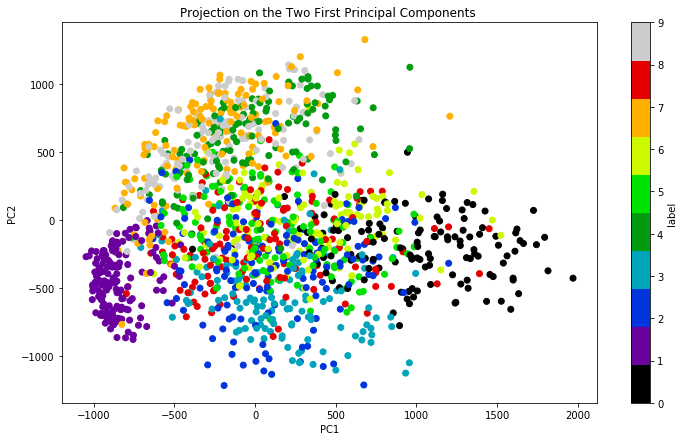

In [11]:
#plot of two first components
plt.subplots(nrows=1, ncols=1, figsize=(12,7))
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.get_cmap('nipy_spectral', 10))
plt.colorbar(label='label')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection on the Two First Principal Components ')
#cbar = plt.colorbar()
#cbar.set_label('Time [ps]')

## Build Model

The models considered are the following:

* Logistic Regression (LR)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Random Forest Classifier (RF).
* Gradient Boosting (GBM).
* Neural Network (MLP).
* Support Vector Machines (SVM).

All models, except MLP, are presented and compared in their default version provided by the sklearn library. In the case of MLP it is predefined to consider hidden_layer_sizes=(16,16). 

We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

In [8]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(16,16))))
models.append(('SVM', svm.SVC()))

In [12]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# fit the models and evaluate it
results = []
names = []

# evaluate each model using 10-FOLD cross validation
for name, model in models:
	kfold = model_selection.KFold(n_splits=3, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
#msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.781451 (0.026985)
KNN: 0.867141 (0.004672)
CART: 0.611441 (0.012274)
RF: 0.633606 (0.034604)
GBM: 0.786454 (0.025056)


C:\Users\Alvaro\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Alvaro\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Alvaro\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP: 0.532160 (0.028212)
SVM: 0.112867 (0.010065)


## Select Best Model

On evaluating all the models, we find that KNN achieves a training accuracy of 0.867141 (86.71%).

We create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 3 times (3 fold cross validation).


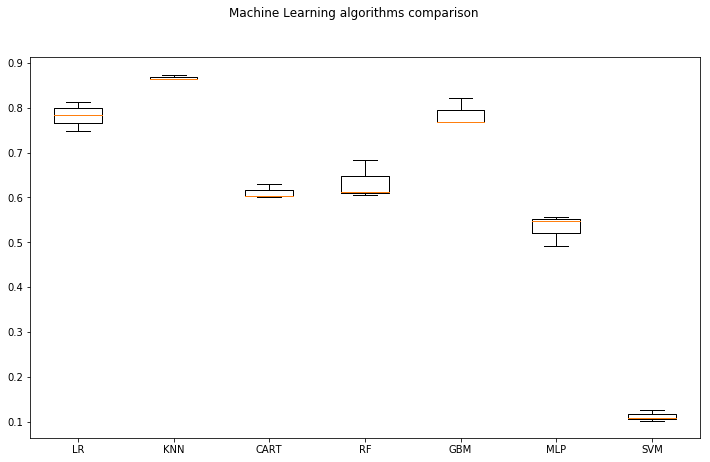

In [13]:
# boxplots for ML algorithm comparison
fig = plt.figure(figsize=(12,7))
fig.suptitle('Machine Learning algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## V BEST MODEL FIT, EVALUATE, AND MAKE PREDICTIONS

## Fitting the Model

In [22]:
# train your model using X_train, Y_train
model = KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Evaluating the Model

### Getting Accuracy and Confusion Matrix

In [23]:
# Evaluating LR model
print('With KNN train datasets () accuracy is: ',round(model.score(X_train,Y_train),4)) # accuracy 

With KNN train datasets () accuracy is:  0.9293


In [24]:
# make predictions on the validation data
predictions = model.predict(X_validation)

# compute the overall accuracy and display the classification report
print("Model --> K-Nearest Neighbors (KNN)")
print('Overall Accuracy: {} Accuracy based on Y_validation, predictions: ',round(accuracy_score(Y_validation, predictions),4))
print('')
cm = confusion_matrix(Y_validation, predictions)
print('Confusion Matrix:\n ',cm)
print(classification_report(Y_validation, predictions))

Model --> K-Nearest Neighbors (KNN)
Overall Accuracy: {} Accuracy based on Y_validation, predictions:  0.8958

Confusion Matrix:
  [[6584   10    6    3    5   30   91   11   14   11]
 [   0 7659   18    8   10    2    2    7    1   12]
 [ 197  411 5720   52   59   13   40  225   57   76]
 [  31  126   79 6229    8  153   20  121  121  110]
 [   8  209   10    3 5599    9   50   57    7  736]
 [  65  120    5  355   37 5296  123   12   49  125]
 [ 102  127   10    1   24   50 6412    1    6    5]
 [   9  185   30    3   65   11    1 6638    1  204]
 [  70  283   61  333   52  248   64   75 5322  181]
 [  45   60   19   81  212   26    9  343   29 5995]]
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      6765
          1       0.83      0.99      0.91      7719
          2       0.96      0.84      0.89      6850
          3       0.88      0.89      0.89      6998
          4       0.92      0.84      0.88      6688
          5       0

Precision, recall and f1-score are metrics to measure the accuracy of classification models.   A general explanation can be got in [Wikipedia](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers).

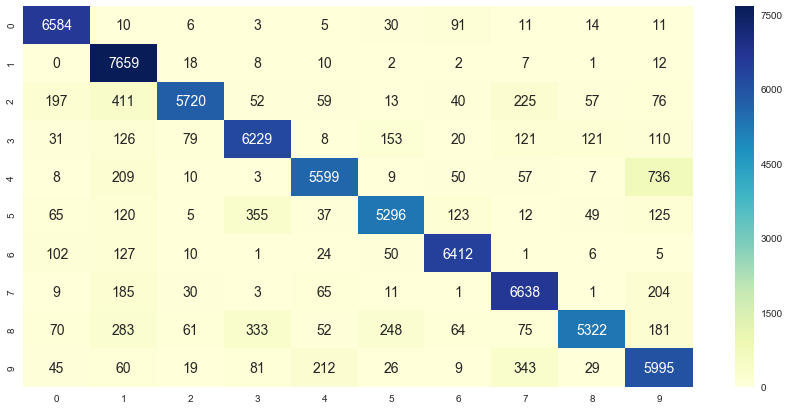

In [36]:
# plot confusion matrix and display the heatmap
plt.figure(figsize=(15,7))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",annot_kws={"size": 14})

## Examining the Model's Mistakes

Let us determine the examples in the validation set where the model predictions were wrong. These correspond to the elements of <font color=red>y_test</font> that are not equal to the same entry in <font color=red>predictions</font>. The numpy where function returns a list of indices that satisfy a condition, so the indices corresponding to the errors are:

In [37]:
error_idx = np.where(Y_validation != predictions)[0]
error_idx
#pd.Series(error_idx.tolist())

array([    0,     8,    22, ..., 68574, 68594, 68597], dtype=int64)

In [38]:
len(error_idx)

7146

We'll choose 20 indices at random from our error_idx array and plot the image, together with the prediction and the correct label:

In [20]:
rand_idx = np.random.choice(error_idx, size=20, replace=False)
rand_idx

array([38003, 54461, 54699, 32303, 24027, 23415, 62576, 66346, 42549,
       26712, 53911, 17058, 16770, 20564, 17339,  3407,   891,  7322,
       27208, 42895], dtype=int64)

The PCA procedure of Sklearn allows us to move from a compressed representation (in our case 154 components) to an approximation of the original high-dimensional data (784 variables). This is really cool, isn’t it? o, now we use this option to generate the desired visualization.

In [21]:
Xtest784back = pca.inverse_transform(X_validation)

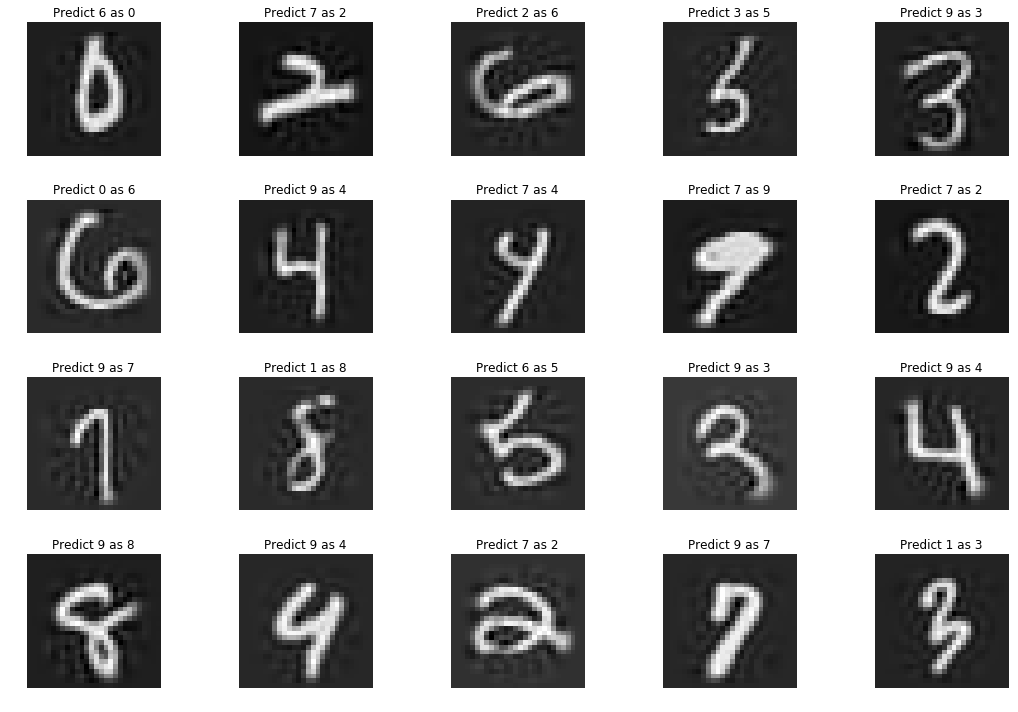

In [23]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(15,10))

i = 0
for ax in axs.reshape(-1):
    ax.set_title("Predict %d as %d" % (predictions[rand_idx[i]],Y_validation[rand_idx[i]]))
    ax.imshow(Xtest784back[rand_idx[i]].reshape(28,28), cmap=plt.cm.gray, origin='upper', interpolation='nearest')
    ax.axis('off')
    i += 1
plt.tight_layout()    
plt.show()

In the exploratory stage of these data () it is concluded that we should expect that the model does not present an extremely high accuracy because the digits have different strokes and, in some cases, turn out to be very strange.
  
From the previous visualization, we can see that the errors of classification of the images are based on that, in general, we can find some cases in which the writing is deficient or the digit has a strange orientation.

This situation, which usually is not a real problem for a human being, constitutes a base of error not easy to overcome by a computational algorithm.

## Making Predictions

### Based on the training dataset

The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set obtained from the partition over X_train (in our case).

In [28]:
predictions = cross_val_predict(model, X_train, Y_train, cv=3)
print('Prediction: {}', predictions)

Prediction: {} [0 1 8 ... 7 3 3]


### Based on the test dataset¶

Now we used the function predict which is regularly the one to be used to get the predictions on a new dataset. In our case, the new dataset is the X_validation one.

In [31]:
# train your model using all data.
startTime = datetime.now()
model.fit(data_pca, y_data) 
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:00:03.135605 seconds.


In [32]:
predictions = model.predict(X_validation)
print('Prediction: {}', predictions)

Prediction: {} [6 0 5 ... 4 7 9]


 <hr>
    By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; Agust 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]